In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("data/emoji_uncleaned.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [34]:
print("Sample Raw : ", df['Tweet'][2])

Sample Raw :  Democracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News


In [35]:
import string
import re

def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove @mentions
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             # remove RT
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [42]:
tweet = df['Tweet'][2]
cleaned = tweet_clean(tweet)

print("Cleaned : ",cleaned)

Cleaned :  democracy plaza in the wake of a stunning outcome decision  nbc news


In [43]:
df["Tweet"] = df["Tweet"].apply(tweet_clean)
df.head(5)

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [44]:
import nltk
import spacy
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def tweet_preprocessing(tweet, nlp=nlp, lemmatizer=lemmatizer):
    
    stop_words = nlp.Defaults.stop_words     
    rm_stop_words_lemma = []
    
    doc = nlp(tweet)
    for token in doc:                                            # tokenization
        if token.text not in stop_words and token.pos_!="PUNCT": 
            lemma_word = lemmatizer.lemmatize(token.text)        # removing stop
            rm_stop_words_lemma.append(lemma_word)               # lemmatizing words 
            
    processed = " ".join(rm_stop_words_lemma)
    return processed

In [45]:
tweet = df['Tweet'][2]
cleaned = tweet_clean(tweet)
print(df.shape)

print("Sample    : ",cleaned)
print("Processed : ",tweet_preprocessing(cleaned))

(50000, 2)
Sample    :  democracy plaza in the wake of a stunning outcome decision  nbc news
Processed :  democracy plaza wake stunning outcome decision   nbc news


In [46]:
df.dropna(inplace=True)
print(df.shape)

(50000, 2)


In [47]:
df["Tweet"] = df["Tweet"].apply(tweet_preprocessing)
df.head(10)
print(df.shape)

(50000, 2)


In [48]:
df.dropna(inplace=True)
print(df.shape)

(50000, 2)


In [49]:
############################### CLEAN DATA READ ################################

In [141]:
df = pd.read_csv("data/stp_lm.csv")

In [142]:
df.dropna(inplace=True)
df

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
...,...,...
49995,ootd love chain new ring putaringonit odesigne...,1
49996,met santa olaf north pole today north pole...,0
49997,new york night strideby herelocationnyc seemyc...,11
49998,kiss birthday girl helzberg diamond,0


In [143]:
############################### COUNT VECTOR ################################

In [144]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()
X = c_vect.fit_transform(df["Tweet"])
c_vect.get_feature_names_out()[110:120]

array(['abstracted', 'abstractnola', 'abswhereareyou', 'abt',
       'abtofficial', 'abtswanlake', 'abuela', 'abuelita', 'abuelito',
       'abuelos'], dtype=object)

In [145]:
X.shape

(49985, 54353)

In [ ]:
#### test train split #### ATLA

In [82]:
import sklearn
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 42487
TEST size: 7498


In [83]:
df_train.head(), df_train.shape

(                                                   Tweet  Label
 28174                             wrapped red   maverick     17
 19672  absolutely beachlakebakery nt wait bring bob t...      0
 8197                     dinner fam   gulf shore alabama      0
 45564  llegando washington    washington district col...      6
 7896   recording single new ep paulrogue drumsdrumsdr...     10,
 (42487, 2))

In [84]:
df_test.head(), df_test.shape

(                                                   Tweet  Label
 18114  request lol listingswanted formyfamily grandju...      2
 48179      got play kazoo playapops latergram burningman      2
 30595         win number   win number good cowboyokstate     15
 19824  possibly favorite costume love chanels screamq...      3
 20263                                           princess     13,
 (7498, 2))

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

df_mini = df.iloc[20:30]

c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(df_mini.Tweet)

x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names_out()

count_vec

,ace,acesnewyork,amp,arena,awhile,ballet,beautiful,belongs,box,brunch,...,sun,super,sweet,tonight,wanda,weekend,wid,wired,wtf,york
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
######################### COUNTER VECT END###########################

In [87]:
######################### SMOTE ###############################

In [55]:
X = df["Tweet"].values
y = df["Label"].values
len(X)
len(y)

49985

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X,y = os.fit_resample(X, y)


print(type(X))
X.getnnz()


<class 'scipy.sparse.csr.csr_matrix'>


1545429

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

#X_train = np.array(X_train)
#X_test = np.array( X_test)
#y_train = np.array(y_train)
#y_test = np.array( y_test)
print(type(X_train))
print(type(y_test))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [ ]:
######################### SMOTE END ###############################

In [ ]:
######################### NORMAL ###############################

In [146]:
#X = df["Tweet"].values
y = df["Label"].values
len(y)

49985

In [147]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify = y)

In [ ]:
######################### NORMAL END ###############################

In [180]:
######################### RANDOM OVER SAMPLER ###############################

In [131]:

y = df["Label"].values

len(y)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify = y)

In [1]:
from imblearn.over_sampling import RandomOverSampler
#X = X.reshape(-1,1)
os = RandomOverSampler()
#X = X.reshape(-1)
X_train, y_train = os.fit_resample(X_train, y_train)


NameError: name 'X' is not defined

In [ ]:
######################### RANDOM OVER SAMPLER END ###############################

In [149]:
import nltk
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
nltk.download("punkt")
tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(df['Tweet'])

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

[nltk_data] Downloading package punkt to /Users/SheN/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total words 54698


In [182]:
###KNN

In [150]:
print(type(X_train))
print(type(y_train))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [151]:
#modeling KNN classifier with 16 neighbors and 3 fold cross validation

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.1192317951453721

In [153]:
print(type(X_test))
print(type(y_test))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [154]:
knn_cv = cross_val_score(knn, X, y, cv=5)
knn_cv.mean()
knn_cv

array([0.1796539 , 0.18075423, 0.1856557 , 0.18535561, 0.17045114])

In [155]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = knn.predict(X_test)
print(type(y_predict))
y_predict


<class 'numpy.ndarray'>


array([ 4, 14,  2, ...,  2,  4,  1])

In [156]:
#y_test = y_test.reshape(-1,1)
#y_predict  = y_predict.reshape(-1,1)
#predict_x = model.predict(X_test)
#classes_x=np.argmax(predict_x,axis=1)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.33      0.02      0.04      1614
           1       0.19      0.05      0.08       792
           2       0.16      0.50      0.24       785
           3       0.07      0.03      0.04       433
           4       0.13      0.16      0.14       377
           5       0.09      0.11      0.10       347
           6       0.03      0.03      0.03       307
           7       0.10      0.05      0.07       284
           8       0.12      0.08      0.09       269
           9       0.07      0.15      0.09       251
          10       0.07      0.04      0.05       232
          11       0.19      0.19      0.19       229
          12       0.16      0.17      0.17       219
          13       0.04      0.09      0.05       202
          14       0.08      0.10      0.09       207
          15       0.05      0.09      0.06       187
          16       0.03      0.05      0.03       196
          17       0.46    

In [157]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Doğru Etiketler')
    plt.xlabel('Tahmini Etiketler')
    plt.tight_layout()

Normalized confusion matrix


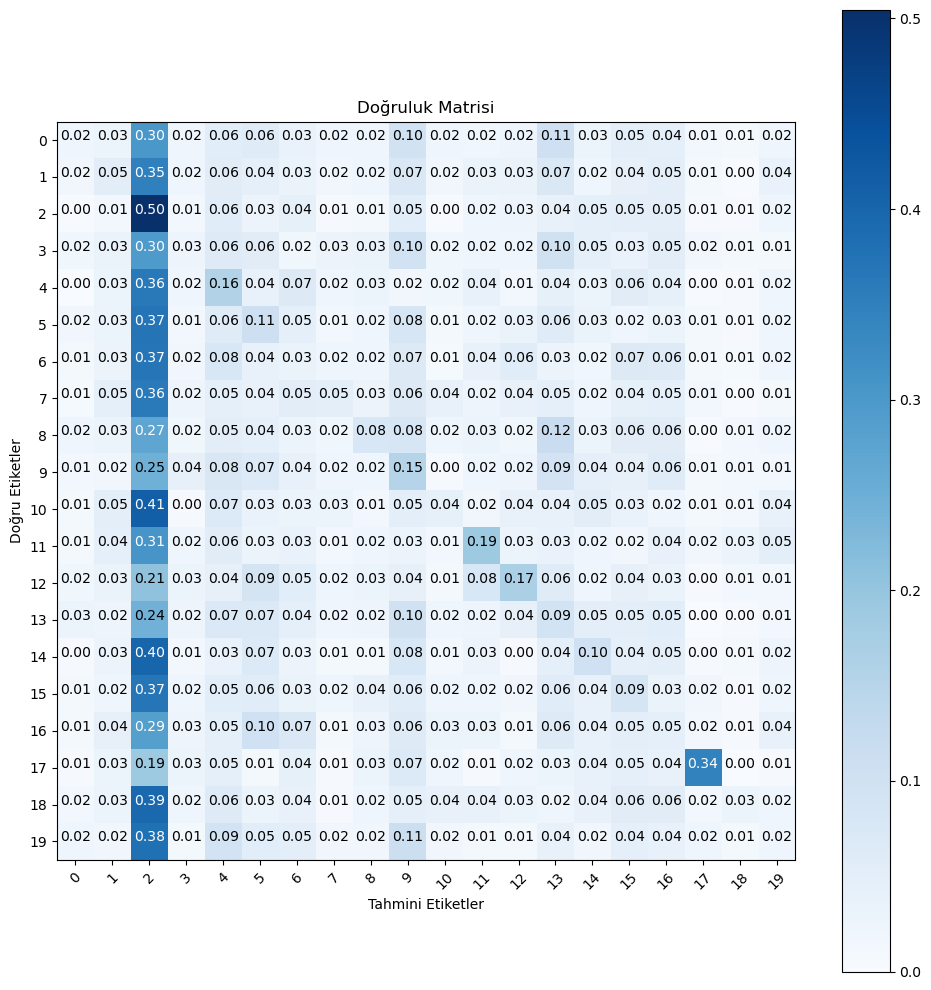

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Doğruluk Matrisi', normalize=True)